In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Phishing_Email.csv')
data

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [3]:
data['Email Text'].replace('empty',np.nan,inplace=True)

C:\Users\fagr\AppData\Local\Temp\ipykernel_21652\3972160757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Email Text'].replace('empty',np.nan,inplace=True)


In [4]:
data.isna().sum()/data.shape[0]*100

Unnamed: 0    0.0000
Email Text    2.9437
Email Type    0.0000
dtype: float64

In [5]:
freq=data['Email Text'].mode()[0]

In [6]:
data

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [7]:
data['Email Text']=data['Email Text'].fillna(freq)

In [8]:
data.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18650.0,NaN,NaN,NaN,9325.154477,5384.327293,0.0,4662.25,9325.5,13987.75,18650.0
Email Text,18650,17536,calpine daily gas nomination > ricky a . arche...,558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Email Type,18650,2,Safe Email,11322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Email Type', ylabel='count'>

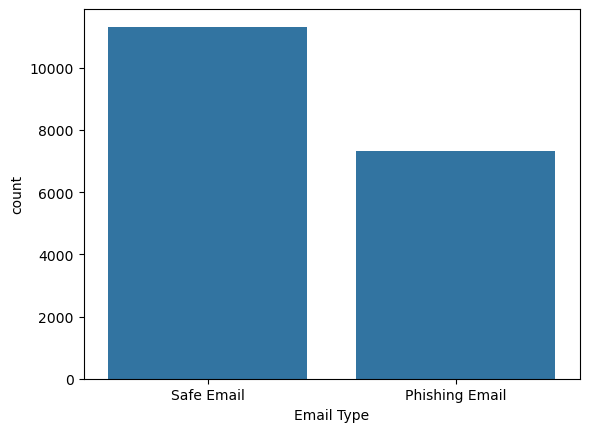

In [10]:
sns.countplot(data=data,x='Email Type')

In [11]:
data['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [12]:
data['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [13]:
data.shape[0]

18650

In [14]:
Safe_Email = data[data["Email Type"]== "Safe Email"]
Phishing_Email = data[data["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [15]:
emaild= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
emaild.head()

,Unnamed: 0,Email Text,Email Type
0,7873,"napoleonville land louise , reliant did not ac...",Safe Email
1,3448,The way Razor breaks down mail is simple. I...,Safe Email
2,16448,re : project vitro review meeting max : i have...,Safe Email
3,13539,"Hi,This has been hashed over a few times on va...",Safe Email
4,8501,"dpr access sally , please let me know your tho...",Safe Email


In [16]:
emaild['Email Text'].values[0]

"napoleonville land louise , reliant did not acquire the land on friday evening because : enron does not have a complete chain of title . we only had it going back to our acquisition of the land . they have gone to the court house this weekend to get relevant documents . we will not indemnify them on potential environmental issues - but they should have done due dilgence this past weekend . i am confident that we will send the land to either texas brine or reliant . reliant will be contacting me today regarding the prior two issues and as stated on friday , they have already cut a cashier ' s check for $ 3 million . regards , mrha"

## text preprocrssing

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
stopwords_set = set(stopwords.words('english'))
lemitize=WordNetLemmatizer()
def cleaning_text(text):
    text=str(text).lower()
    text = text.lower()  
    text = re.sub('<.*?>', '', text)  #remove html
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # remove url
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text=re.sub(r'\s+',' ',text) # remove spaces
    text=[lemitize.lemmatize(word)for word in text.split()if word not in stopwords_set]
    text=' '.join(text)
    return text
data['clean_email']=data['Email Text'].apply(lambda text:cleaning_text(text))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
data['Email Type']=data['Email Type'].map({'Safe Email':0,'Phishing Email':1})
data['Email Type']

0        0
1        0
2        0
3        1
4        1
        ..
18645    1
18646    0
18647    0
18648    0
18649    1
Name: Email Type, Length: 18650, dtype: int64

In [21]:
x=data['clean_email']
y=data['Email Type']
tfid=TfidfVectorizer()
tfid.fit(data['clean_email'].values)
matrix=tfid.transform(data['clean_email'].values)
x_train, x_test, y_train, y_test = train_test_split(matrix, y, test_size=0.33, random_state=42)

## modeling

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3727
           1       0.95      0.95      0.95      2428

    accuracy                           0.96      6155
   macro avg       0.96      0.96      0.96      6155
weighted avg       0.96      0.96      0.96      6155



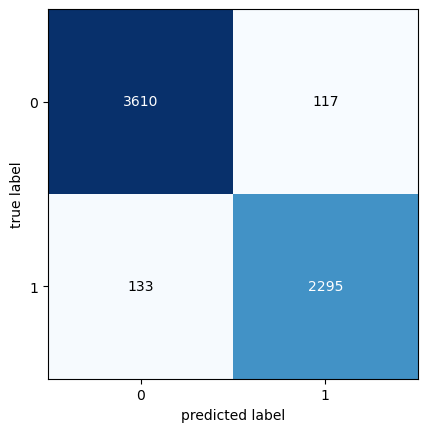

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix 
lg = LogisticRegression()
lg.fit(x_train,y_train)
con=confusion_matrix(y_test,lg.predict(x_test))
plot_confusion_matrix(con)
print(classification_report(y_test,lg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3727
           1       0.94      0.96      0.95      2428

    accuracy                           0.96      6155
   macro avg       0.96      0.96      0.96      6155
weighted avg       0.96      0.96      0.96      6155



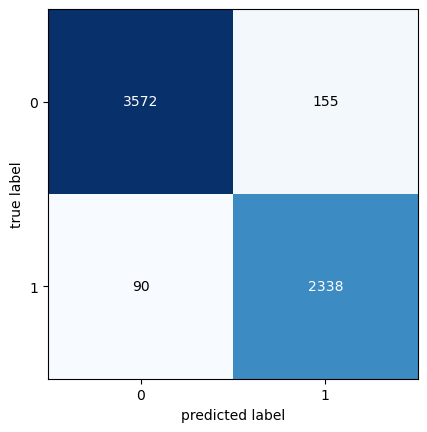

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
con=confusion_matrix(y_test,xgb.predict(x_test))
plot_confusion_matrix(con)
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3727
           1       0.96      0.83      0.89      2428

    accuracy                           0.92      6155
   macro avg       0.93      0.90      0.91      6155
weighted avg       0.92      0.92      0.92      6155



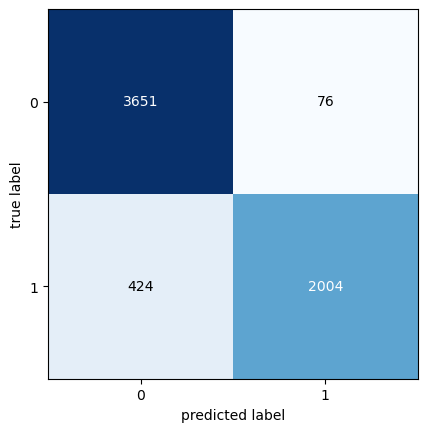

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
con=confusion_matrix(y_test,nb.predict(x_test))
plot_confusion_matrix(con)
print(classification_report(y_test,nb.predict(x_test)))